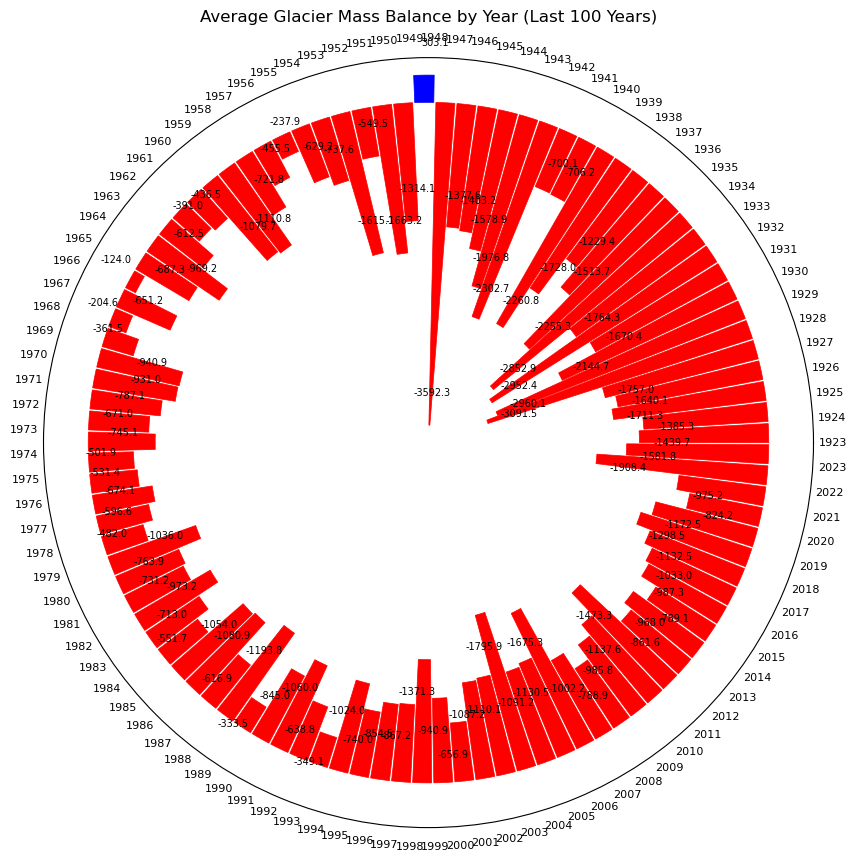

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv('mass_balance.csv', sep=',')
df.columns = df.columns.str.strip()
df = df.dropna(subset=['YEAR', 'ANNUAL_BALANCE'])
df['YEAR'] = df['YEAR'].astype(int)

# Filter to last 100 years
latest_year = df['YEAR'].max()
df_last_100 = df[df['YEAR'] >= latest_year - 100]

if df_last_100.empty:
    print("No data available for the last 100 years.")
else:
    # Compute average annual balance per year
    avg_annual_balance = df_last_100.groupby('YEAR')['ANNUAL_BALANCE'].mean().reset_index()
    years = avg_annual_balance['YEAR']
    balances = avg_annual_balance['ANNUAL_BALANCE']
    num_bars = len(years)
    angles = np.linspace(0, 2 * np.pi, num_bars, endpoint=False)

    # Use 90% of the full angular width to add spacing between bars
    bar_width = (2 * np.pi / num_bars) * 0.9

    # Create polar plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})
    bars = ax.bar(angles, balances, width=bar_width, bottom=0, align='edge',
                  edgecolor='black', linewidth=0.5)

    # Color and label bars
    for angle, balance, bar in zip(angles, balances, bars):
        bar.set_color('red' if balance < 0 else 'blue')
        
        # Label each bar slightly beyond its height
        radius = bar.get_height() + 0.1 * max(abs(balances))
        ax.text(angle, radius, f"{balance:.1f}", ha='center', va='center', fontsize=7)

    # Set year labels at each bar angle
    ax.set_xticks(angles)
    ax.set_xticklabels(years, fontsize=8, rotation='vertical')

    # Clean up radial appearance
    ax.set_yticklabels([])
    ax.grid(False)
    ax.set_title('Average Glacier Mass Balance by Year (Last 100 Years)', va='bottom')

    plt.show()